## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-006-Gaussian-Mixture-01

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [2]:
colors = ['Blue', 'darkorange', 'red']

In [3]:
fileName = '../../Data/Roses07.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Roses07.csv


In [4]:
datarawdf = pd.read_csv(fileFullName, header=0)
print(datarawdf.shape)
print(datarawdf.columns)

(150, 8)
Index(['StemLength', 'StemWidth', 'FlowerlLength', 'FlowerWidth', 'RoseType1',
       'RoseType2', 'RoseType3', 'RoseName'],
      dtype='object')


In [5]:
Xdf = datarawdf[['StemLength', 'StemWidth', 'FlowerlLength', 'FlowerWidth']].copy(deep=True)
Xdf.columns = ['F01', 'F02', 'F03', 'F04']
datanp = np.array(Xdf)

In [6]:
ydf = datarawdf['RoseType1'].copy(deep=True)
ydf.columns = ['T']
targetnp = np.array(ydf)
targetlabels=pd.unique(targetnp)
print(targetlabels)

[0 1 2]


In [7]:
ldf = datarawdf['RoseName'].copy(deep=True)
ldf.columns = ['L']
labelnp = np.array(ldf)
roselabels=pd.unique(ldf)
print(roselabels)

['Suntory Blue ' 'Port Sunlight' 'Eternity Red']


In [8]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color,alpha=0.8)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [9]:
# Divide the dataset into non-overlapping training (75%) and testing (25%) sets.
skf = StratifiedKFold(n_splits=4)

# Only take the first fold.
train_index, test_index = next(iter(skf.split(datanp, targetnp)))

X_train = datanp[train_index]
y_train = targetnp[train_index]
X_test = datanp[test_index]
y_test = targetnp[test_index]

n_classes = len(np.unique(y_train))

# Test a GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes, verbose_interval=1,
                   covariance_type=cov_type, max_iter=20, random_state=0, verbose=1))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

Running: spherical
{'covariance_type': 'spherical', 'init_params': 'kmeans', 'max_iter': 20, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': 0, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 1, 'verbose_interval': 1, 'warm_start': False, 'weights_init': None}
Initialization 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
  Iteration 9
  Iteration 10
  Iteration 11
Initialization converged: True
Running: diag
{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 20, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': 0, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 1, 'verbose_interval': 1, 'warm_start': False, 'weights_init': None}
Initialization 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
Initialization converged: True
Running: tied
{'covariance_type': 'tied', 'init_params': 'kmeans', '

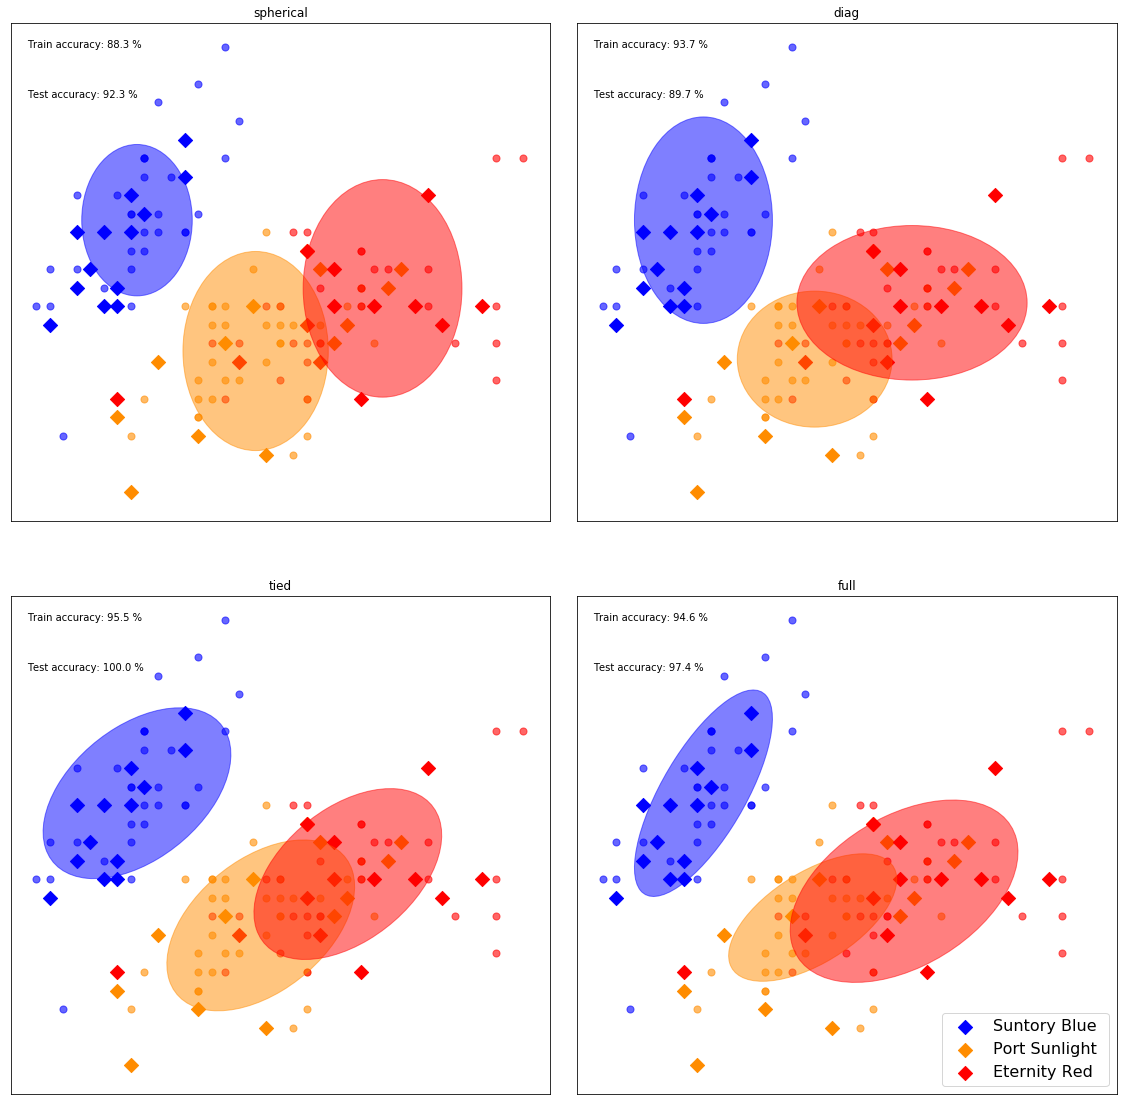

Done!


In [10]:
figheight=8

fig1=plt.figure(figsize=(figheight * n_estimators // 2, figheight * n_estimators // 2))
plt.subplots_adjust(bottom=0.02, top=0.95, hspace=0.15, wspace=0.05, left=0.02, right=0.98)


for index, (name, estimator) in enumerate(estimators.items()):
    print('='*80)
    print('Running:', name)
    print('='*40)
    print(estimator.get_params(deep=True))
    print('='*80)
    
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the hyper parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datanp[targetnp == n]
        plt.scatter(data[:, 0], data[:, 1], s=50, marker='o', color=color, alpha=0.6)
    # Plot the test data with diamands
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], s=100, marker='D', color=color, label=roselabels[n])

    y_train_pred = estimator.predict(X_train)
        
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.03, 0.95, 'Train accuracy: %3.1f %%' % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.03, 0.85, 'Test accuracy: %3.1f %%' % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=(figheight*2)))

print('='*80)
plt.show()

print('='*80)
print('Done!')
print('='*80)

In [11]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-007-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


## Done

In [12]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-20 14:24:34.292004
